In [2]:
# Ariel Hasse, David Hitlin, SURF; 
# UV full spectrum extended with shortpass filter; 1350 Volts
# This program pulls the channel number and energy count for each source in the specified PMT
# set-up. It fits the energy peaks to a gaussian and records the peak value to find the calibration
# between known source energy and channel number. This slope and the expected radium energy peaks
# create the quenching factor for each energy level. The final output is a txt file with the resolutions
# of the peaks, the gaussian parameters, the calibration factor, and the quenching factors and all png 
# files for each plot produced.


%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
from scipy.optimize import minimize 
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import interp

In [3]:
def retrieve_data(file):
    '''This function takes data from a file and outputs the columns into two lists, x and y. 
    The file must have two columns of data seperated by a tab. The argument requires a 
    docstring for the file name.'''
    
    # A place hold list, a place hold string, the first column value in string, the second 
    # column value in string, x values list, and y values list
    point = []
    num = ''
    first = ''
    second = ''
    x = []
    y = []
    
    # This opens the file and reads the first line to discard the first value
    f = open(file, 'r')
    f.readline()
    
    # This will loop through each line to extract the x and y values and append it to the 
    # x and y lists
    for line in f:
        num = ''
        point = list(line)
        
        # This loop removes the first value in point and the tab in between the columns.
        for i in range(len(point)):
            if point[0] == '\t':
                del point[0]
                first = num
                break
            else: 
                num += point[0]
                del point[0]
        num = ''
        
        # This loop saves each column in the list as a string and creates an integer
        # of the second value. It saves the placeholder num value to second when the tab
        # at the end of the file occurs. 
        for i in range(len(point)):
            if point[0] == '\t':
                del point[0]
                second = num
                break
            else: 
                num += point[0]
                del point[0]
        x.append(float(first))
        y.append(float(second))
        
    return x, y

In [4]:
def data_interval(x, y, upper, lower):
    ''' This function takes two lists, x an y, and two integers, upper and lower.
    It outputs two lists within the upper and lower bounds (determined by the x variable)''' 
    
    # counter for y index, list for segmented x values, list for segmented y values
    count = 0
    newx = []
    newy = []
    for i in x:
        if i > lower:
                if i < upper:
                    newx.append(i)
                    newy.append(y[count])
        count += 1
    return newx, newy

In [9]:
def rawdata(x, y, title, xname, yname, legend):
    ''' This function takes two lists and graphing information and plots the 
    lists against eachother'''
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

In [10]:
def bestfit(x, y):
    ''' This function takes two lists and finds the line of bestfit'''
    best = np.polyfit(x, y, 2, full = True)
    plt.plot(x, np.poly1d(np.polyfit(x, y, 2))(x))
    return best 
 

In [11]:
def poly(guess):
    '''This is a polynomial chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.power(arx, 2) + guess[1]*arx + guess[2] - ary, 2))
  

In [12]:
def gauss(guess):
    '''This is a gaussian chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.exp(-np.power((arx-guess[1]), 2)/(2*np.power(guess[2], 2))) + guess[3]*arx + guess[4] - ary, 2))
    

In [13]:
def optimize(f, guess):
    '''Takes a function and potential parameters and outputs the minimized 
    values for the guess'''
    fit = minimize(f, guess, method= 'Nelder-Mead', bounds = ((0, None), (0, None), (0, None), (None, 0), (0, None)))
    return fit
   
  

In [14]:
def linefitpoly(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    ct = 0
    y = []
    for i in x:
        y.append(ans[0]*np.power(x[ct], 2) + ans[1]*x[ct] + ans[2])
        ct += 1
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

In [15]:
def linefitgauss(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    i = 0
    y = []
    for i in x:
        y.append(ans[0]*np.exp(-np.power((i-ans[1]), 2)/(2*np.power(ans[2], 2)))+ ans[3]*i + ans[4])
    plt.plot(x, y)
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

 

In [16]:
def linefitgaussRn(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    i = 0
    y = []
    for i in x:
        y.append(ans[0]*np.exp(-np.power((i-ans[1]), 2)/(2*np.power(ans[2], 2)))+\
            ans[3]*np.exp(-np.power((i-ans[4]), 2)/(2*np.power(ans[5], 2))) +\
            ans[6]*np.exp(-np.power((i-ans[7]), 2)/(2*np.power(ans[8], 2)))+ ans[9]*i + ans[10])
    plt.plot(x, y)
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()        
 

In [17]:
def gaussRn(guess):
    '''This is a gaussian chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.exp(-np.power((arx-guess[1]), 2)/(2*np.power(guess[2], 2)))\
        + guess[3]*np.exp(-np.power((arx-guess[4]), 2)/(2*np.power(guess[5], 2))) + \
        guess[6]*np.exp(-np.power((arx-guess[7]), 2)/(2*np.power(guess[8], 2))) + arx*guess[9] + guess[10] - ary, 2))
                                                      
                                           

In [18]:
def resolution(opt):
    '''This finds the resolution of the fit using the width, standard deviation
    and the center, the mean'''
    values = list(opt.x)
    return values[2]/values[1]
    

In [19]:
def conversion(opt, y):
    '''Automated Line of Best Fit for gamma and electron sources'''
    y = []
    x = []
    rawx =[]
    for i in opt:
        rawx.append(i)
    for i in rawx:
        x.append(i[1])
    for i in y:
        y.append(i)
    plt.errorbar(x, y, xerr = (opt[0][0], opt[1][0], opt[2][0]))
    plt.scipy.stats.linregress(x, y)
    plt.show()

In [90]:
def line(x, i, j):
    ''' A linear function'''
    return i*x + j  

In [1]:
def chan_kev():
    '''By replacing the x, y, and err values the function plots the points with
    their error and plots the line of bestfit. AmBe is only a guess; it has not been fitted.'''
    x = [60, 511, 662, 1170, 1274, 1330]
    y = [500, 3200, 4510.3, 7908, 7991, 8243.4]
    err = [100, 226, 245.9, 349, 372.8, 398.8]
    names = [' ', 'Na-22 First  ', 'Cs-137  ', 'Co-60 First  ', 'Na-22 Second  ', 'Co-60 Second  ']
    first = ['  AmBe-241']
    yfit = []
    linfit = curve_fit(line, x, y, guessregress, sigma = err)
    for i in range(1400):
        yfit.append(i*linfit[0][0] + linfit[0][1])
    plt.errorbar(x, y, yerr= err, linestyle = 'None', marker = 'o', label = 'Raw Data Points')
    plt.plot(range(1400), yfit, label = 'Line of Best Fit')
    plt.ylim(-100, 17000)
    plt.title('Channel to Kev Count for Four Radioactive Sources')
    plt.xlabel('Known Particle Energy (KeV)')
    plt.ylabel('Channels (ADC)')
    plt.legend(loc = 2)
    #for i, txt in enumerate(names):
        #plt.annotate(txt, (x[i],y[i]), ha = 'right')
        #plt.show()
    #for i, txt in enumerate(first):
        #plt.annotate(txt, (x[i], y[i]), ha = 'left')
        #plt.show()
    plt.show()    
    print linfit
  

In [98]:
def radium():
    '''x represents the known keV values for the Ra impurities and y represents 
    the measured values in channels. This function outputs the quenching factor 
    for each measurement'''
    known = [4800, 5500, 6000, 7700]
    measured = [10272.3, 12294.8, 14130.2, 19937.6]
    error1 = [468.2, 635, 431.4, 708.7]
    error2 = []
    names = ['Ra-226    ', 'Ra-222    ', 'Po-218   ', 'Po-214    ']
    coun = 0
    tick = 0
    quench = []
    yfit = []
    for i in measured:
        pred = i*.157
        quench.append(known[coun]/pred)
        coun += 1
    linfit = stats.linregress(known, quench)
    for i in range(8000):
        yfit.append(i*linfit[0] + linfit[1])
    for i in error1:
        exper = measured[tick]
        recor = known[tick]
        error2.append((i*recor)/(math.pow(exper, 2)))
        tick += 1
    plt.plot(range(8000), yfit, label = 'Line of Best Fit')
    plt.xlim(4000, 8000)
    plt.errorbar(known, quench, yerr = error2, marker = 'o', linestyle = 'None', label = 'Quenching Factor')
    plt.title('Quenching Factor at Various Energies for Ra 226 in BaF2')
    plt.xlabel('Energy in keV')
    plt.ylabel('Quenching Factor (Birks Constant)')
    plt.legend(loc = 1)
    #for i, txt in enumerate(names):
        #plt.annotate(txt, (known[i],quench[i]), ha = 'right')
        #plt.show()
    plt.show()
    return quench
    
    

 

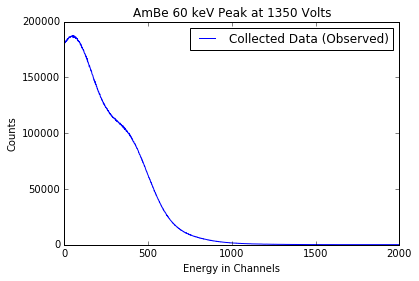

In [55]:
# AmBe 241

poly = [-.000001, .2, -1600]

hyp = [20000, 3200, 1000, -.00001, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('AmBeFilter1350.txt')[0], alldata('AmBeFilter1350.txt')[1], 2000, 0)[0]
y1 = energy(alldata('AmBeFilter1350.txt')[0], alldata('AmBeFilter1350.txt')[1], 2000, 0)[1]  
        
rawdata(x1, y1, 'AmBe 60 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
#fitted = optimize(gauss, hyp)
#linefitgauss(fitted, x1, 'AmBe 60 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
#print resolution(fitted)
#print fitted.x

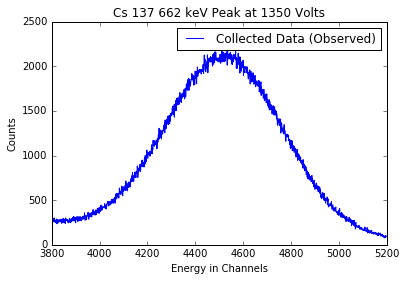

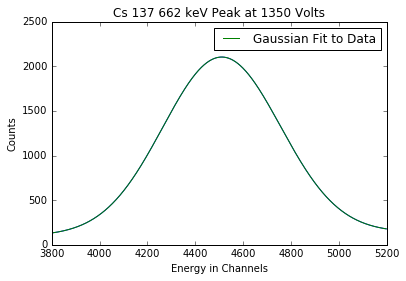

0.0545127452489
[  1.98228834e+03   4.51033753e+03   2.45870881e+02   2.68170812e-02
  -8.02625819e-02]


In [63]:
# Cs 137

poly = [-.000001, .2, -1600]

hyp = [2000, 4600, 1000, -.00001, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('CsFilter1350.txt')[0], alldata('CsFilter1350.txt')[1], 5200, 3800)[0]
y1 = energy(alldata('CsFilter1350.txt')[0], alldata('CsFilter1350.txt')[1], 5200, 3800)[1]  
        
rawdata(x1, y1, 'Cs 137 662 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gauss, hyp)
linefitgauss(fitted, x1, 'Cs 137 662 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

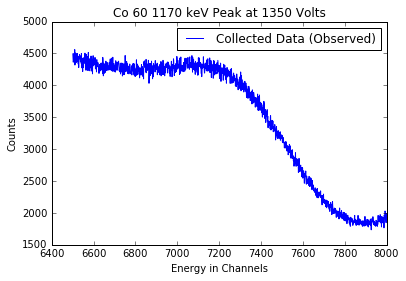

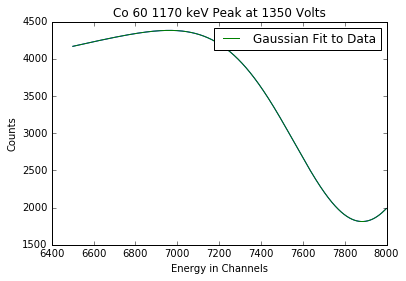

0.0441197088087
[ -3.25028450e+03   7.90794824e+03   3.48896373e+02   6.41218958e-01
  -1.68834266e-04]


In [35]:
# Co 60 First Peak

poly = [-.000001, .2, -1600]

hyp = [4500, 7400, 1000, .3, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('CoFilter1350.txt')[0], alldata('CoFilter1350.txt')[1], 8000, 6500)[0]
y1 = energy(alldata('CoFilter1350.txt')[0], alldata('CoFilter1350.txt')[1], 8000, 6500)[1]  
        
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Co 60 1170 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Co 60 1170 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

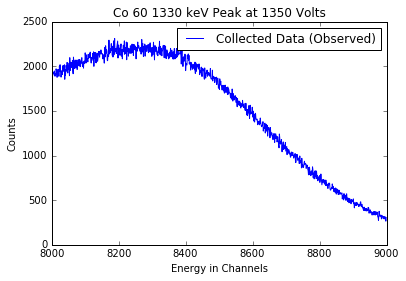

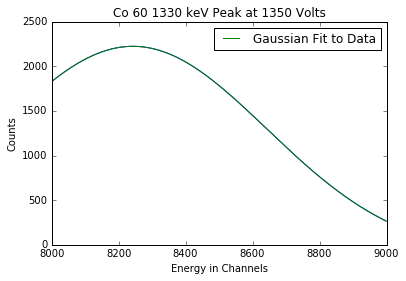

0.0483780050569
[  2.33555147e+03   8.24345850e+03   3.98802077e+02  -1.36203745e-02
  -2.87412593e-04]


In [45]:
# Co 60 Second Peak

poly = [-.000001, .2, -1600]

hyp = [2500, 8300, 1000, .19, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('CoFilter1350.txt')[0], alldata('CoFilter1350.txt')[1], 9000, 8000)[0]
y1 = energy(alldata('CoFilter1350.txt')[0], alldata('CoFilter1350.txt')[1], 9000, 8000)[1]  
        
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Co 60 1330 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Co 60 1330 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

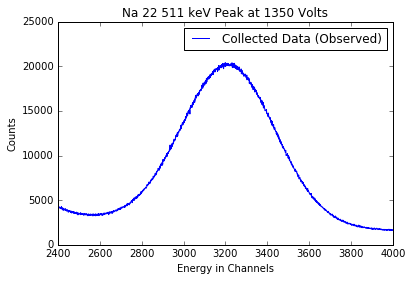

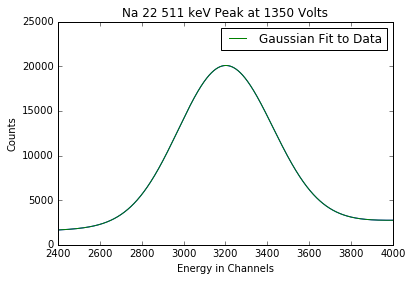

0.0706094317497
[  1.79130743e+04   3.20005487e+03   2.25954056e+02   6.81908623e-01
  -1.06112391e+01]


In [49]:
# Na 22 First Peak

poly = [-.000001, .2, -1600]

hyp = [20000, 3200, 1000, -.00001, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('NaFilter1350.txt')[0], alldata('NaFilter1350.txt')[1], 4000, 2400)[0]
y1 = energy(alldata('NaFilter1350.txt')[0], alldata('NaFilter1350.txt')[1], 4000, 2400)[1]  
        
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Na 22 511 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Na 22 511 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

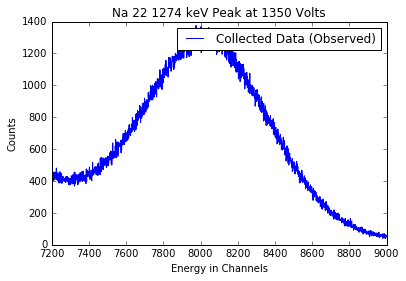

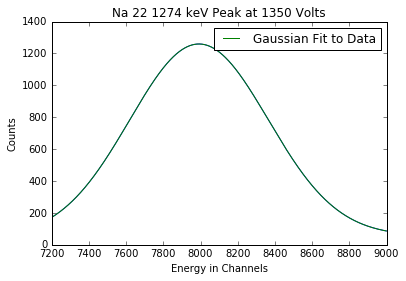

0.0466509970591
[  1.21030159e+03   7.99096843e+03   3.72786645e+02   6.17160920e-03
  -8.20016423e-03]


In [52]:
# Na 22 Second Peak

poly = [-.000001, .2, -1600]

hyp = [1300, 8100, 1000, -.0001, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('NaFilter1350.txt')[0], alldata('NaFilter1350.txt')[1], 9000, 7200)[0]
y1 = energy(alldata('NaFilter1350.txt')[0], alldata('NaFilter1350.txt')[1], 9000, 7200)[1]  
        
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Na 22 1274 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Na 22 1274 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

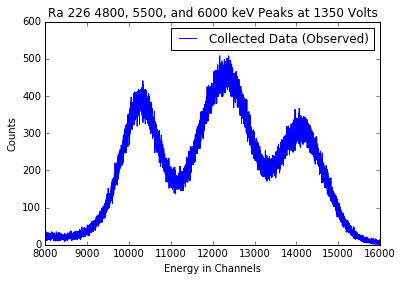

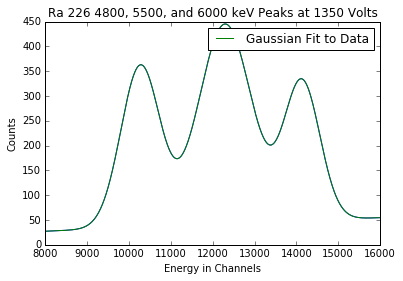

0.0305323703179
[  2.80156756e+02   1.41302490e+04   4.31429995e+02   4.03143016e+02
   1.22947946e+04   6.34988431e+02   3.25289087e+02   1.02722640e+04
   4.68209196e+02   3.42030272e-03  -2.25665641e-02]


In [86]:
# Ra 226 First Three Peaks

threepeaks = [90, 10000, 1000, 195, 12000, 800, 70, 14200, 1000, 0, 0]

x1 = energy(alldata('RaFilter1350.txt')[0], alldata('RaFilter1350.txt')[1], 16000, 8000)[0]
y1 = energy(alldata('RaFilter1350.txt')[0], alldata('RaFilter1350.txt')[1], 16000, 8000)[1]  
        
rawdata(x1, y1, 'Ra 226 4800, 5500, and 6000 keV Peaks at 1350 Volts', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gaussRn, threepeaks)
linefitgaussRn(fitted, x1, 'Ra 226 4800, 5500, and 6000 keV Peaks at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

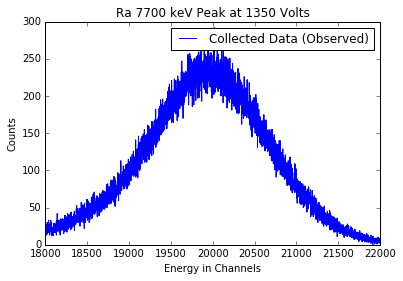

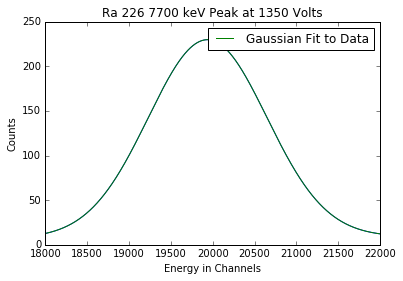

0.0355461283507
[  2.21573628e+02   1.99375813e+04   7.08703825e+02   4.09590655e-04
   2.75281737e-02]


In [85]:
# Ra 226 Fourth Peak

poly = [-.000001, .2, -1600]

hyp = [250, 20000, 2000, -.000001, -.0001]

threepeaks = [80, 10000, 1200, 80, 12000, 1200, 80, 14200, 1200, 0, 0]

x1 = energy(alldata('RaFilter1350.txt')[0], alldata('RaFilter1350.txt')[1], 22000, 18000)[0]
y1 = energy(alldata('RaFilter1350.txt')[0], alldata('RaFilter1350.txt')[1], 22000, 18000)[1]  
        
rawdata(x1, y1, 'Ra 7700 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gauss, hyp)
linefitgauss(fitted, x1, 'Ra 226 7700 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

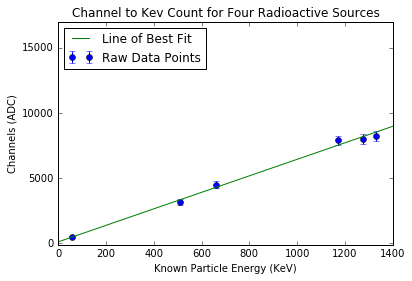

(array([   6.33012509,  121.118187  ]), array([[  2.78515651e-02,  -9.54591189e+00],
       [ -9.54591189e+00,   8.25253076e+03]]))


In [95]:
guessregress = [11, 50]
chan_kev()

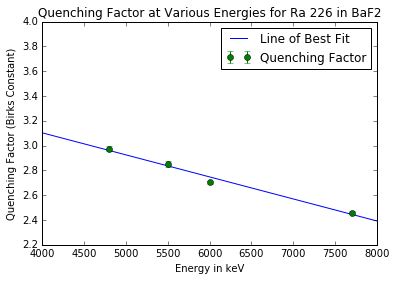

[2.9762807168446512, 2.8493222446691253, 2.7046015279015254, 2.459904200468519]

In [99]:
radium()